FFHS DAS Data Science  
Semesterarbeit FS20  
Iwan Imsand

Statistische Datenanalyse, StatDa  
**Nach der vierten Präsenz**

# Hypothesentest

In diesem Kapitel wird ein Hypothesentest durchgeführt.

## Fragestellung

* **Sind die Werte des Merkmals ```Age 2020``` normalverteilt?**

## Daten für die Analysen

Als Grundlage für nachfolgende Analyse dienen die folgenden Daten:

| Dateiname                                                                            | Beschreibung
| ------------------------------------------------------------------------------------ | -------------
| **```samples_5000_201910-citibike-tripweather-data.parquet```**                      | Enthält 5000 zufällig gewählte Stichproben aus dem Monat Oktober des Jahres 2019.

Die vorhandenen Merkmale wurden in 1_0_SemArb-StatDa_Deskriptive-Analyse.ipynb eingehender beschrieben, daher wird hier darauf verzichtet.

Alle Dateien befinden sich im Pfad ```./../data/citibike/tripdata/```.

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import kstest

In [2]:
%matplotlib inline

In [3]:
pd.options.display.float_format = '{:.5f}'.format

In [4]:
path = './../data/citibike/tripdata'

In [5]:
tripdata = pd.read_parquet(os.path.join(path, 'samples_5000_201910-citibike-tripweather-data.parquet'))

## Sind die Werte des Merkmals ```Age 2020``` normalverteilt?

In diesem Kapitel wird geprüft ob die Werte des Merkmals ```Age 2020``` normalverteilt sind oder nicht.

Dabei lautet

$H_0$: Die Werte des Merkmals ```Age 2020``` sind normalverteilt.  
$H_1$: Die Werte des Merkmals ```Age 2020``` sind nicht normalverteilt.

### Visueller Test auf Normalverteilung

#### Histogramm

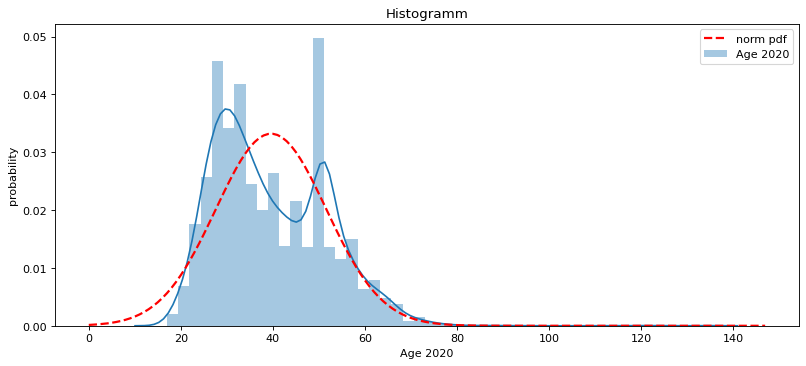

In [6]:
fig = plt.figure(figsize=(12,5), dpi=80)
ax = sns.distplot(tripdata['Age 2020'], label='Age 2020')

x_norm = np.arange(0, tripdata['Age 2020'].max()*1.1, 1)
y_norm = stats.norm.pdf(x_norm, scale=tripdata['Age 2020'].std(), loc=tripdata['Age 2020'].mean())
ax.plot(x_norm, y_norm, 'r--', lw=2, label='norm pdf') 

plt.xlabel('Age 2020')
plt.ylabel('probability')
plt.title('Histogramm')

ax.legend()

plt.show()

In [7]:
print('Skew: {}, Kurtosis: {}'.format(tripdata['Age 2020'].skew(), tripdata['Age 2020'].kurt()))

Skew: 0.6114609690527856, Kurtosis: 0.47641051935474765


Im Histogramm ist ersichtlich, dass
* es einen ziemlichen Ausschlag bei einer Klasse in der Nähe von 30 und 50 gibt. Es gibt hier zwei Spitzen.
* die Dichtefunktion der Normalverteilung (gestrichelt rote Kurve), nicht der Dichtefunktion der Beobachtungen entspricht.
* die Daten schief sind, dies bestätigt auch der Wert 'Skew' mit 0.6115, die Daten sind rechtsschief (oder linkssteil).
* die Daten steiler gewölbt sind als die Normalverteilung, dies bestätigt auch der Wert 'Kurtosis' mit 0.4764 sowie die Dichtekurven.

#### Quantile-Quantile Plot (QQ-Plot)

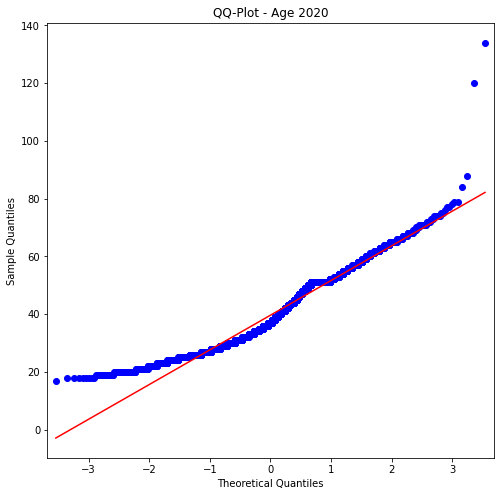

In [8]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot()
ax.set_title('QQ-Plot - Age 2020')
#sm.qqplot((tripdata['Age 2020']-tripdata['Age 2020'].mean())/tripdata['Age 2020'].std(), line='s', ax=ax, color='b', scale=tripdata['Age 2020'].std(), loc=tripdata['Age 2020'].mean(), fit=True)
sm.qqplot(tripdata['Age 2020'], line='s', ax=ax, color='b')

plt.show()

Der QQ-Plot zeigt eine Abweichung von der roten Linie (Normalverteilung). Vor allem im Bereich links unten gibt es eine starke Abweichung sowie bei einigen Punkten rechts oben. Es ist auch im QQ-Plot zu erkennen, dass keine Normalverteilung vorliegt.

### Statistische Tests auf Normalverteilung

Die in den visuellen Tests gewonnenen Erkenntnisse werden in diesem Kapitel mit statistischen Tests üperprüft. Es soll ein Test auf Normalverteilung durchgeführt werden.

#### Shapiro-Wilk Test

Hier wird der Hypothesentest mit dem [Shapiro-Wilk Test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) durchgeführt. Dabei wird $\alpha=0.05$ gewählt. Wenn $p>\alpha$, dann kann $H_0$ nicht zurückgewiesen werden und die Daten sind normalverteilt. Ist $p\leq\alpha$, dann wird $H_0$ zurückgewiesen und die Daten sind nicht normalverteilt.

In [9]:
alpha = 0.05
stat, p = shapiro(tripdata['Age 2020'])
print('Statistics=%.5f, p=%.5f' % (stat, p))
if (p > alpha):
    print('Die Daten sehen normalverteilt aus -> H0 kann nicht zurückgewiesen werden!')
else:
    print('Die Daten sehen nicht normalverteilt aus -> H0 wird zurückgewiesen!')

Statistics=0.95282, p=0.00000
Die Daten sehen nicht normalverteilt aus -> H0 wird zurückgewiesen!


Der p-Wert ist hier 0, es besteht also eine 0%-ige Wahrscheinlichkeit das wir einen Fehler I. Art begehen.

In der Dokumentation wird beschrieben, dass der Test einen nicht akkuraten Wert $p$ liefern kann, falls $N > 5000$. Dies ist hier zwar nicht der Fall, da $N=5000$, aber es werden trotzdem noch 2 weitere Tests durchgeführt, die Bestätigen sollen, dass $H_0$ zurückgewiesen werden muss.

#### D'Agostino's K-squared Test

Hier wird der Hypothesentest mit dem [D'Agostino's K-squared Test](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test) durchgeführt. Dabei wird auch hier $\alpha=0.05$ gewählt. Wenn $p>\alpha$, dann kann $H_0$ nicht zurückgewiesen werden und die Daten sind normalverteilt. Ist $p\leq\alpha$, dann wird $H_0$ zurückgewiesen und die Daten sind nicht normalverteilt.

In [10]:
alpha = 0.05
stat, p = normaltest(tripdata['Age 2020'])
print('Statistics=%.5f, p=%.5f' % (stat, p))
if (p > alpha):
    print('Die Daten sehen normalverteilt aus -> H0 kann nicht zurückgewiesen werden!')
else:
    print('Die Daten sehen nicht normalverteilt aus -> H0 wird zurückgewiesen!')

Statistics=298.88393, p=0.00000
Die Daten sehen nicht normalverteilt aus -> H0 wird zurückgewiesen!


Der p-Wert ist hier 0, es besteht also eine 0%-ige Wahrscheinlichkeit das wir einen Fehler I. Art begehen.

#### Anderson-Darling Test

Hier wird der Hypothesentest mit dem [Anderson-Darling-Test](https://de.wikipedia.org/wiki/Anderson-Darling-Test) durchgeführt. Dieser Test liefert eine Liste von kritischen Werten zurück und nicht ein einziger p-Wert. In der vorliegenden Implementierung darf $H_0$ nicht zurückgewiesen werden, wenn der berechnete Wert 'Statistics' kleiner als der kritische Wert ist.

In [11]:
result = anderson(np.array(tripdata['Age 2020'], dtype='int64'))
print('Statistics=%.5f' % (result.statistic))
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Signifikanzlevel %.5f: kritscher Wert %.5f, die Daten sehen normalverteilt aus -> H0 kann nicht zurückgewiesen werden!' % (sl, cv))
    else:
        print('Signifikanzlevel %.5f: kritischer Wert %.5f, die Daten sehen nicht normalverteilt aus -> H0 wird zurückgewiesen!' % (sl, cv))

Statistics=72.91573
Signifikanzlevel 15.00000: kritischer Wert 0.57600, die Daten sehen nicht normalverteilt aus -> H0 wird zurückgewiesen!
Signifikanzlevel 10.00000: kritischer Wert 0.65500, die Daten sehen nicht normalverteilt aus -> H0 wird zurückgewiesen!
Signifikanzlevel 5.00000: kritischer Wert 0.78600, die Daten sehen nicht normalverteilt aus -> H0 wird zurückgewiesen!
Signifikanzlevel 2.50000: kritischer Wert 0.91700, die Daten sehen nicht normalverteilt aus -> H0 wird zurückgewiesen!
Signifikanzlevel 1.00000: kritischer Wert 1.09100, die Daten sehen nicht normalverteilt aus -> H0 wird zurückgewiesen!


### Resultat

Die Fragestellung kann mit einem **Nein** beantwortet werden.

Eine visuelle Prüfung anhand des Histogramms sowie des QQ-Plots hat gezeigt das keine Normalverteilung vorliegt.

Auch wurden 3 verschiedene, statistische Tests durchgeführt, die alle **die Hypothese $H_0$ zurückweisen** und somit die Erkenntnisse der visuellen Prüfung bestätigen.